<a href="https://colab.research.google.com/github/Shruti-T/TensorFlow-for-AI-ML-DL/blob/main/Computer_Vision_Accuracy_using_Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(train_img, train_label),(test_img, test_label) = fmnist.load_data()

#normaliztion
train_img = train_img/255.0
test_img = test_img/255.0

# Define the model
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(2,2),activation='relu',input_shape=(28,28,1)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64,(2,2),activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128,activation='relu'),
                                   tf.keras.layers.Dense(10,activation='softmax')])


# Print the model summary
model.summary()

# Setup training parameters
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(train_img, train_label, epochs = 5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_img,test_label)

4422102/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        16448     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                           

1/1 [==============================] - 0s 22ms/step


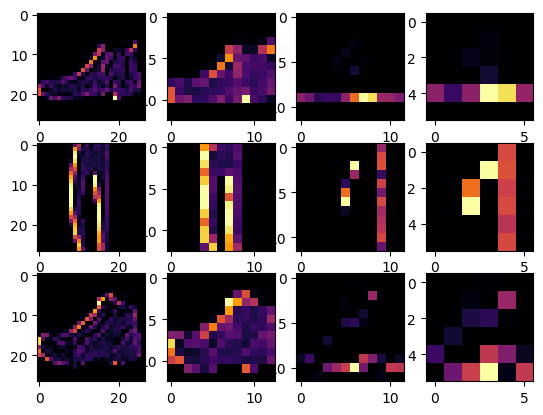

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=2
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_img[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_img[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_img[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [3]:
# grader-required-cell

import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

# grader-required-cell

# Load the data

# Get current working directory
current_dir = os.getcwd()

# Append data/mnist.npz to the previous path to get the full path
# data_path = os.path.join(current_dir, "data/mnist.npz")

# Get only training set
(training_images, training_labels), _ = tf.keras.datasets.mnist.load_data(path='mnist.npz')


# grader-required-cell

# GRADED FUNCTION: reshape_and_normalize

def reshape_and_normalize(images):

    ### START CODE HERE

    # Reshape the images to add an extra dimension
    images = images.reshape(images.shape[0], images.shape[1], images.shape[2], 1)

    # Normalize pixel values
    images = images/255.0

    ### END CODE HERE

    return images
# grader-required-cell

# Reload the images in case you run this cell multiple times
(training_images, _), _ = tf.keras.datasets.mnist.load_data(path='mnist.npz')

# Apply your function
training_images = reshape_and_normalize(training_images)

print(f"Maximum pixel value after normalization: {np.max(training_images)}\n")
print(f"Shape of training set after reshaping: {training_images.shape}\n")
print(f"Shape of one image after reshaping: {training_images[0].shape}")


# grader-required-cell

# GRADED CLASS: myCallback
### START CODE HERE

# Remember to inherit from the correct class
class myCallback(tf.keras.callbacks.Callback):
    # Define the method that checks the accuracy at the end of each epoch
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>=0.995):
            print('Reached 99.5% accuracy so cancelling training!')
            self.model.stop_training = True


### END CODE HERE


# grader-required-cell

# GRADED FUNCTION: convolutional_model
def convolutional_model():
    ### START CODE HERE

    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=[28,28,1]),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation=tf.nn.relu),
        tf.keras.layers.Dense(10,activation = tf.nn.softmax)

    ])
    ### END CODE HERE

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# grader-required-cell

# Save your untrained model
model = convolutional_model()

# Get number of weights
model_params = model.count_params()

# Unit test to limit the size of the model
assert model_params < 1000000, (
    f'Your model has {model_params:,} params. For successful grading, please keep it '
    f'under 1,000,000 by reducing the number of units in your Conv2D and/or Dense layers.'
)

# Instantiate the callback class
callbacks = myCallback()

# Train your model (this can take up to 5 minutes)
history = model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

# grader-required-cell

print(f"Your model was trained for {len(history.epoch)} epochs")

if not "accuracy" in history.model.metrics_names:
    print("Use 'accuracy' as metric when compiling your model.")
else:
    print("The metric was correctly defined.")

11490434/11490434 [==============================] - 0s 0us/step
Maximum pixel value after normalization: 1.0

Shape of training set after reshaping: (60000, 28, 28, 1)

Shape of one image after reshaping: (28, 28, 1)
Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1423 - accuracy: 0.9574
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0513 - accuracy: 0.9838
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0312 - accuracy: 0.9903
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0213 - accuracy: 0.9931
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0134 - accuracy: 0.9957
Your model was trained for 5 epochs
The metric was correctly defined.
